## 1.导入包

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2.读取数据

In [4]:
data = pd.read_csv('logisticRegression_data1.csv')
X = data.iloc[:,:2]
y = data.iloc[:,-1]
train,test=train_test_split(data,test_size=0.2,stratify=data.iloc[:,-1])
train_x = train.iloc[:,:2]
train_y = train.iloc[:,-1]

test_x = test.iloc[:,:2]
test_y = test.iloc[:,-1]

## 3.模型构建、训练和测试
- (1)使用默认参数构建模型

In [5]:
lr_model = LogisticRegression() #调用模型，但是并未经过任何调参操作，使用默认值
lr_model.fit(train_x,train_y) #训练模型
train_score = lr_model.score(train_x,train_y)
test_score = lr_model.score(test_x,test_y)
print('train_score',train_score) #获取训练集的accuracy
print('test_score',test_score) #获取测试集的accuracy

train_score 0.9
test_score 0.85


- (2)使用liblinear构建模型

In [43]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')#构建模型，使用默认参数
model.fit(train_x, train_y)#训练模型

train_score = model.score(train_x, train_y)#训练集评分
test_score = model.score(test_x, test_y)#测试集评分
print('train score: {train_score:.6f}; test score: {test_score:.6f}'.format(
    train_score=train_score, test_score=test_score))

train score: 0.800000; test score: 0.900000


- (3)使用高阶多项式优化模型

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 增加多项式预处理
def polynomial_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=1,solver='liblinear')


model.fit(train_x, train_y)

train_score = model.score(train_x, train_y)
cv_score = model.score(test_x, test_y)
print('train_score: ', train_score)
print('cv_score: ', cv_score)

train_score:  0.8
cv_score:  0.9


- (4)使用高阶多项式+L2正则化来优化

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 增加多项式预处理
def polynomial_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=1,penalty='l2',solver='liblinear')


model.fit(train_x, train_y)

train_score = model.score(train_x, train_y)
cv_score = model.score(test_x, test_y)
print('train_score: ', train_score)
print('cv_score: ', cv_score)

train_score:  0.8
cv_score:  0.9


- (5)使用高阶多项式+L1正则化来优化

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
# 增加多项式预处理
def polynomial_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logistic_regression", logistic_regression)])
    return pipeline

model = polynomial_model(degree=1,penalty='l1',solver='liblinear')


model.fit(train_x, train_y)

train_score = model.score(train_x, train_y)
cv_score = model.score(test_x, test_y)
print('train_score: ', train_score)
print('cv_score: ', cv_score)

train_score:  0.9125
cv_score:  0.85


# 4.可视化结果
- 用学习曲线判断模型表现

(1)可视化多项式+L1优化模型的结果

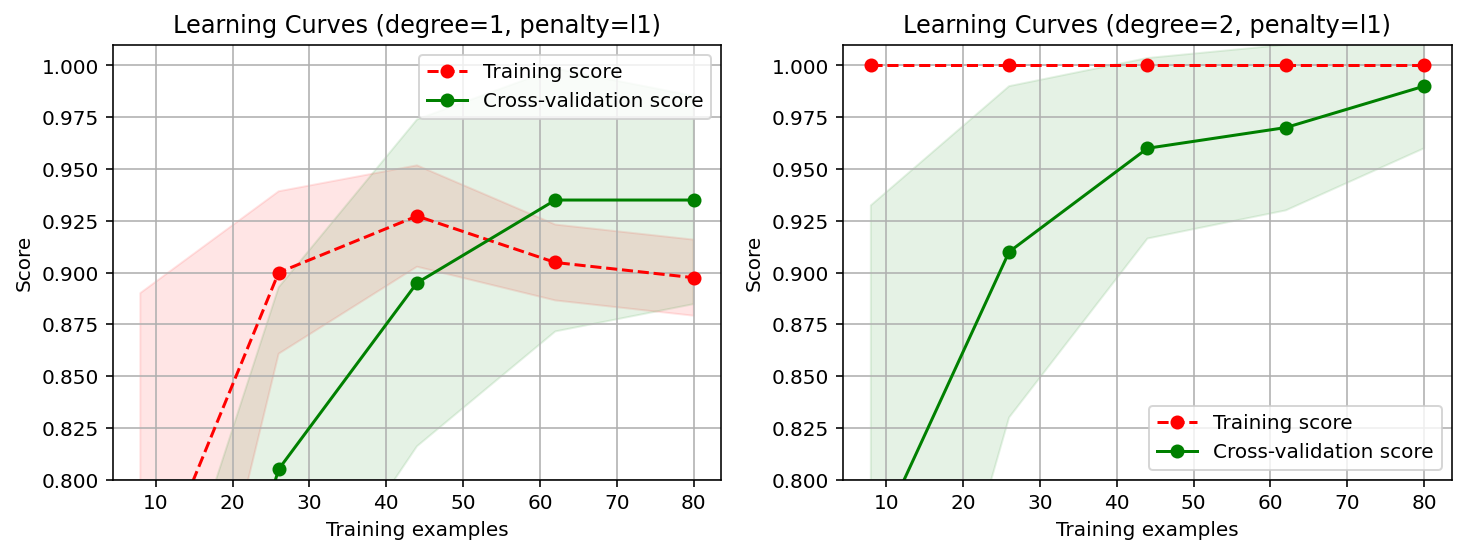

In [41]:
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves (degree={0}, penalty={1})'
degrees = [1, 2]
penalty = 'l1'

plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='liblinear', max_iter=300), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)

(2)可视化多项式+L2优化模型的结果

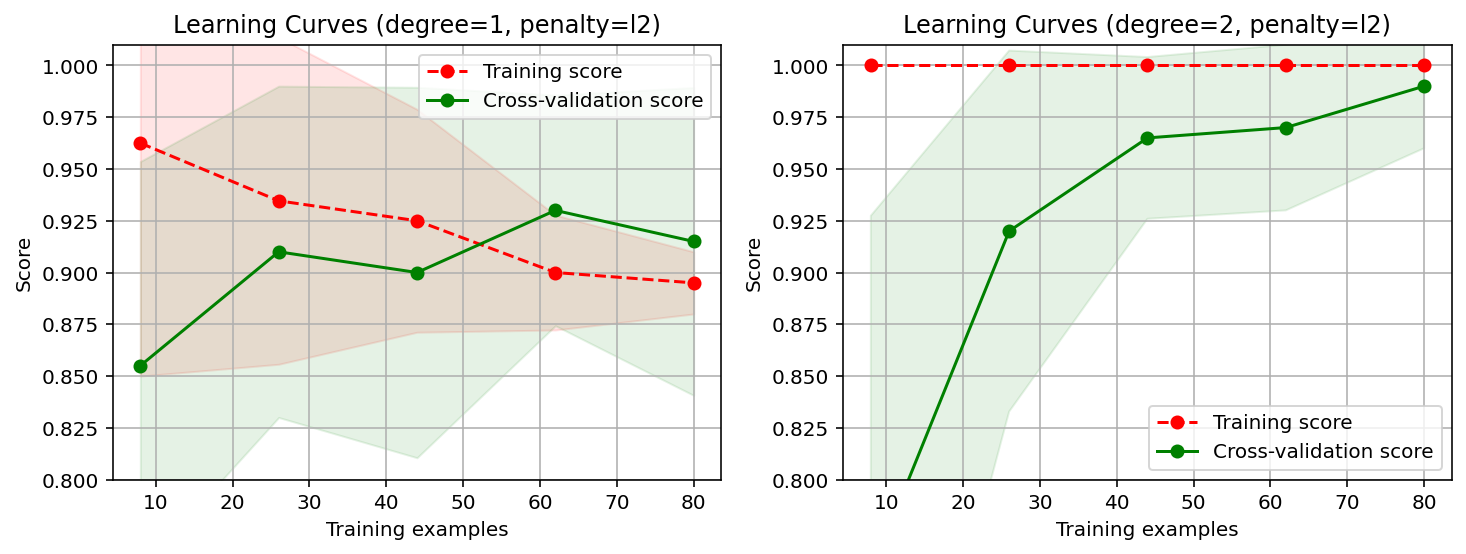

In [42]:
import warnings
warnings.filterwarnings("ignore")

penalty = 'l2'


plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, polynomial_model(degree=degrees[i], penalty=penalty, solver='lbfgs'), 
                        title.format(degrees[i], penalty), X, y, ylim=(0.8, 1.01), cv=cv)
